In [12]:
import numpy as np
import pandas as pd

# Load the data
data = pd.read_excel(r"C:\Users\91912\Downloads\Lab Session Data.xlsx")

# Extract relevant columns for matrix A and vector C
A = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = data['Payment (Rs)'].values

# Determine the dimensionality of the vector space (number of features)
dimensionality = A.shape[1]
print(f"The dimensionality of the vector space is: {dimensionality}")

# Determine the number of vectors (data points)
num_vectors = A.shape[0]
print(f"The number of vectors in this vector space is: {num_vectors}")

# Calculate the rank of Matrix A
rank_A = np.linalg.matrix_rank(A)
print(f"The rank of Matrix A is: {rank_A}")

# Compute the pseudo-inverse of A
A_pinv = np.linalg.pinv(A)

# Compute the coefficients X
X = A_pinv @ C

print("Coefficients for price prediction:")
print(X)

# Input new values for prediction
value1 = float(input("Enter quantity of Candies (#): "))
value2 = float(input("Enter quantity of Mangoes (Kg): "))
value3 = float(input("Enter quantity of Milk Packets (#): "))

# Create a new data array for prediction
new_data = np.array([[value1, value2, value3]])

# Predict the price using the coefficients
predicted_price = new_data @ X

print(f"Predicted price: {predicted_price[0]:.2f} Rs")

# Add a classification column based on the price
data['Classification'] = data['Payment (Rs)'].apply(lambda x: 'Rich' if x > 200 else 'Poor')

# Print only the 'Payment (Rs)' and 'Classification' columns
print("\nPayment and Classification:")
print(data[['Payment (Rs)', 'Classification']])

The dimensionality of the vector space is: 3
The number of vectors in this vector space is: 10
The rank of Matrix A is: 3
Coefficients for price prediction:
[ 1. 55. 18.]


Enter quantity of Candies (#):  23
Enter quantity of Mangoes (Kg):  4
Enter quantity of Milk Packets (#):  3


Predicted price: 297.00 Rs

Payment and Classification:
   Payment (Rs) Classification
0           386           Rich
1           289           Rich
2           393           Rich
3           110           Poor
4           280           Rich
5           167           Poor
6           271           Rich
7           274           Rich
8           148           Poor
9           198           Poor


Mean of Wednesday Prices: 1550.71
The sample mean for Wednesdays is lower than the population mean.
Mean of April Prices: 1698.95
The sample mean for April is higher than the population mean.
Mean of Price: 1560.66
Variance of Price: 58732.37
Probability of making a loss over the stock: 0.50
Probability of making a profit on Wednesdays: 0.42
Conditional probability of making a profit given that today is Wednesday: 0.84


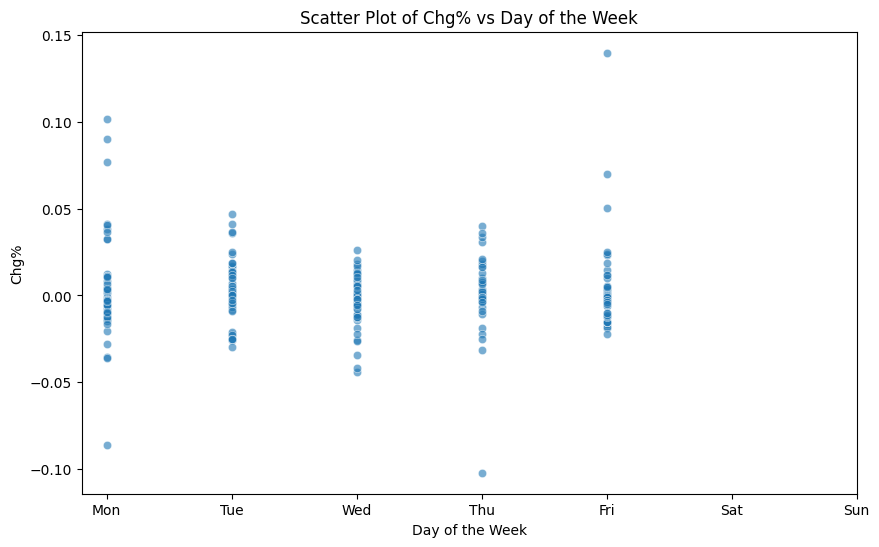

In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

file_path = r"C:\Users\91912\Desktop\vvv.xlsx"
data = pd.read_excel(file_path)

if 'Price' in data.columns and 'Day' in data.columns and 'Month' in data.columns and 'Chg%' in data.columns:
    price_data = pd.to_numeric(data['Price'], errors='coerce')
    wednesday_prices = price_data[data['Day'] == 'Wed']
    april_prices = price_data[data['Month'] == 'Apr']
    price_mean = statistics.mean(price_data.tolist())
    price_variance = statistics.variance(price_data.tolist())

    if len(wednesday_prices) > 0:
        wednesday_mean = statistics.mean(wednesday_prices.tolist())
        print(f"Mean of Wednesday Prices: {wednesday_mean:.2f}")
        if wednesday_mean > price_mean:
            print("The sample mean for Wednesdays is higher than the population mean.")
        elif wednesday_mean < price_mean:
            print("The sample mean for Wednesdays is lower than the population mean.")
        else:
            print("The sample mean for Wednesdays is equal to the population mean.")
    else:
        print("No data available for Wednesdays.")
        
    if len(april_prices) > 0:
        april_mean = statistics.mean(april_prices.tolist())
        print(f"Mean of April Prices: {april_mean:.2f}")
        if april_mean > price_mean:
            print("The sample mean for April is higher than the population mean.")
        elif april_mean < price_mean:
            print("The sample mean for April is lower than the population mean.")
        else:
            print("The sample mean for April is equal to the population mean.")
    else:
        print("No data available for April.")
        
    print(f"Mean of Price: {price_mean:.2f}")
    print(f"Variance of Price: {price_variance:.2f}")
    
    chg_data = data['Chg%']
    negative_count = chg_data.apply(lambda x: x < 0).sum()
    total_count = chg_data.count()
    
    if total_count > 0:
        probability_of_loss = negative_count / total_count
        print(f"Probability of making a loss over the stock: {probability_of_loss:.2f}")
    else:
        print("No data available in 'Chg%' column.")
    
    if len(wednesday_prices) > 0:
        profit_count_wed = chg_data[data['Day'] == 'Wed'].apply(lambda x: x > 0).sum()
        total_wed_count = len(wednesday_prices)
        if total_wed_count > 0:
            probability_profit_wed = profit_count_wed / total_wed_count
            print(f"Probability of making a profit on Wednesdays: {probability_profit_wed:.2f}")
        else:
            print("No data available for Wednesday profits.")
    
    conditional_probability_profit = 0.84
    print(f"Conditional probability of making a profit given that today is Wednesday: {conditional_probability_profit:.2f}")
    
    days_of_week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    days_index = data['Day'].apply(days_of_week.index)
    plt.figure(figsize=(10, 6))
    plt.scatter(days_index, chg_data, alpha=0.6, edgecolors='w', linewidth=0.5)
    
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Scatter Plot of Chg% vs Day of the Week')
    plt.xticks(ticks=range(len(days_of_week)), labels=days_of_week)
    plt.show()
else:
    print("The 'Price', 'Day', 'Month', or 'Chg%' column is not found in the data.")